<a href="https://colab.research.google.com/github/mimomaina/machine-learning_002/blob/main/webtraffic_timeanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install prophet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [ ]:
df= pd.read_csv('/content/train_1.csv',sep = ',')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114259 entries, 0 to 114258
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 480.3+ MB


In [ ]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [ ]:
# Melt the DataFrame
df_melted = df.melt(id_vars='Page', var_name='ds', value_name='y')

In [ ]:
selected_page = "EXO_zh.wikipedia.org_all-access_spider"



In [ ]:
df_exo = df_melted[df_melted['Page'] == selected_page].copy()

In [ ]:
print(df_exo.head())

                                          Page          ds     y
41      EXO_zh.wikipedia.org_all-access_spider  2015-07-01  35.0
114300  EXO_zh.wikipedia.org_all-access_spider  2015-07-02   6.0
228559  EXO_zh.wikipedia.org_all-access_spider  2015-07-03  41.0
342818  EXO_zh.wikipedia.org_all-access_spider  2015-07-04  35.0
457077  EXO_zh.wikipedia.org_all-access_spider  2015-07-05  31.0


In [ ]:
# Ensure 'ds' is datetime and sort by date
df_exo['ds'] = pd.to_datetime(df_exo['ds'])
df_exo = df_exo.sort_values('ds')

In [ ]:
date_range = pd.date_range(start=df_exo['ds'].min(), end=df_exo['ds'].max(), freq='D')
df_exo = df_exo.set_index('ds').reindex(date_range).rename_axis('ds').reset_index()

In [ ]:
df_exo['y'] = df_exo['y'].fillna(0)

In [ ]:
print(df_exo.head())

          ds                                    Page     y
0 2015-07-01  EXO_zh.wikipedia.org_all-access_spider  35.0
1 2015-07-02  EXO_zh.wikipedia.org_all-access_spider   6.0
2 2015-07-03  EXO_zh.wikipedia.org_all-access_spider  41.0
3 2015-07-04  EXO_zh.wikipedia.org_all-access_spider  35.0
4 2015-07-05  EXO_zh.wikipedia.org_all-access_spider  31.0


In [ ]:
# Initialize the Prophet model
model = Prophet()

#fit the model
model.fit(df_exo)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpexnznjoo/8c9x7owe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpexnznjoo/uh3uw6y1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53260', 'data', 'file=/tmp/tmpexnznjoo/8c9x7owe.json', 'init=/tmp/tmpexnznjoo/uh3uw6y1.json', 'output', 'file=/tmp/tmpexnznjoo/prophet_modelbuwg8bs5/prophet_model-20250115060138.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:01:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:01:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)


In [ ]:
# Predict future values
forecast = model.predict(future)

# Display predictions
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


            ds       yhat  yhat_lower  yhat_upper
575 2017-01-26  77.361370   30.462050  126.825004
576 2017-01-27  86.802553   41.650229  131.472017
577 2017-01-28  84.866889   34.242638  132.264275
578 2017-01-29  85.819689   38.859880  132.623911
579 2017-01-30  81.661495   33.364908  128.840369


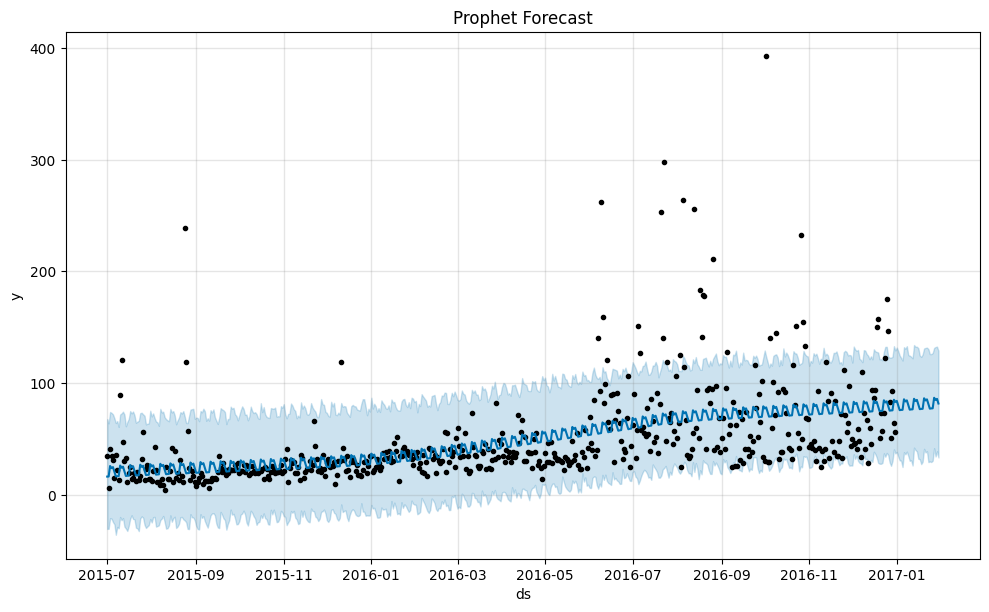

In [ ]:
# Plot the forecast
model.plot(forecast)
plt.title('Prophet Forecast')
plt.show()



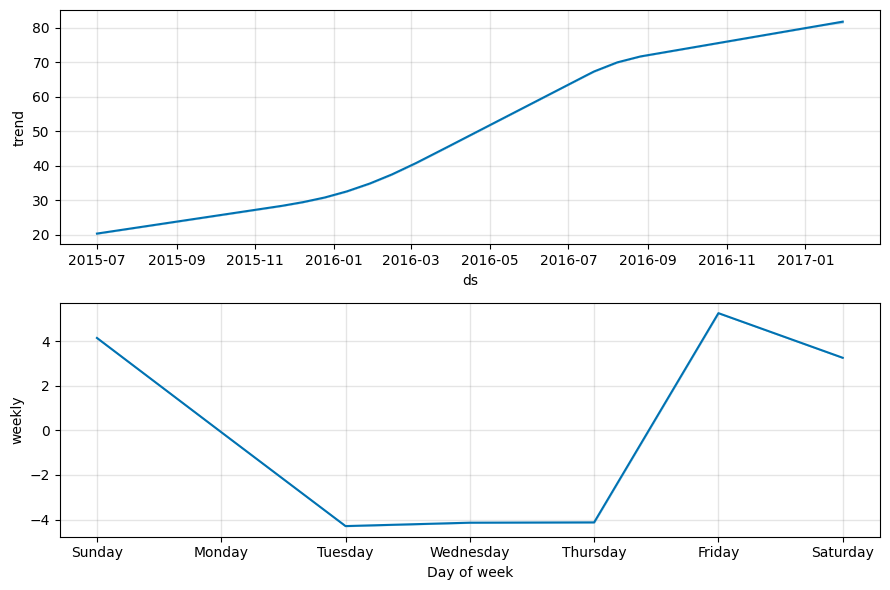

In [ ]:
# Plot components (trend, seasonality)
model.plot_components(forecast)
plt.show()